<img src=./img/Brown_logo.svg width=30%>

# F3DASM: Framework for Data-Driven Design & Analysis of Structures & Materials

https://github.com/bessagroup/f3dasm

### Martin van der Schelling | <a href = "mailto: martin_van_der_schelling@brown.edu">martin_van_der_schelling@brown.edu</a>  | PhD candidate

## Outline of today

### Presentation

* Motivation & Challenges
* What's in the box?

### Practical session

# Motivation

* Continuous search for the most efficient design based on specific criteria.
* High-dimensional solution space due to the **overwhelming number of potential combinations**
* Challenge to **accelerate** the optimization process. 
* Impractical to conduct experimental investigations of each concept. 
* Data-driven computational analyses

In [1]:
from IPython.display import Video

<img src=./img/schematics/supercompressible_icon.png width=5%, align='right'>

## Example 1: Designing Supercompressible materials

In [2]:
Video("./video/fragile_becomes_supercompressible.mp4", width=1024, height=576)

*Bessa, M. A., Glowacki, P., & Houlder, M. (2019). Bayesian Machine Learning in Metamaterial Design: Fragile Becomes Supercompressible. Advanced Materials, 31(48), 1–6. https://doi.org/10.1002/adma.201904845*

<img src=./img/schematics/supercompressible_icon.png width=5%, align='right'>

## Example 1: Designing Supercompressible materials

<img src=./img/supercompressible/process.png width=60%, align='left'>

<img src=./img/supercompressible/schematic.png width=30%, align='right'>

<!-- <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br> -->

* Parametrizing your structure from a concept
* Sampling designs
* Run finite element simulation (ABAQUS)
* Learn the objective for the full range of designs
* Manufacture your found optimum

<img src=./img/schematics/l2o_icon.png width=5%, align='right'>

## Example 2: Learning to Choose Optimizers

<img src=./img/l2o/Adam.gif width=40%, align='right'>



<img src=./img/functions/Sphere.png width=15%, align='left'><img src=./img/functions/Schwefel.png width=15%, align='left'>

<img src=./img/l2o/optimization.png width=30%, align='left'>


* Optimizers performance is dependent on the loss-landscape characteristics
* No 'one optimizer to rule them all'
* Learn a model to determine the training dynamics in a data-driven manner

## Data-driven process

Closer look at the two examples:

<img src=./img/schematics/supercompressible.png width=100%>

<img src=./img/schematics/l2co.png width=100%>

Looks like completely different studies ..

## Data-driven process

Common *elements* in the data-driven process:

<img src=./img/schematics/blocks.png width=100%>

* **Design of experiments**, in which input variables describing the microstructure, structure, properties and external conditions of the system to be evaluated are determined and sampled;

* **Data generation**, typically through computational analysis, resulting in the creation of a material response database;

* **Machine learning**, in which a surrogate model is trained to fit experimental findings;

* **Optimization**, where we try to iteratively improve the model to obtain a superior design.

<img src=./img/schematics/blocks.png width=100%>

<br>

<img src=./img/schematics/supercompressible_colored.png width=100%>

<img src=./img/schematics/l2co_colored.png width=100%>

## Challenge

* Not all data-driven processes are the same ..
* Conservative when it comes to **openly sharing databases and software**. 
* Numerous machine-learning packages.
* ... we are not all software engineers

Unified interface for the data-driven process so that researchers do not have to ‘reinvent the wheel’ for common procedures:

* Parallelization
* Data management
* Comparing and benchmarking state-of-the-art methods 


# ``f3dasm``: Framework for Data-Driven Design & Analysis of Structures & Materials

https://github.com/bessagroup/f3dasm

## What's in the box?

* Python open-source package hosted on [PyPI](https://pypi.org/project/f3dasm/):

```
pip install f3dasm
```

✅ Compatible with the **three major operating systems** and **Python 3.7+**

⭐ User-friendly **interfaces** for each of the stages in the data-driven process

🏃‍♂️ Built-in **defaults** for getting started right away! 

📈 Easy parallelization on **high-performance computing systems**

💾 Automatic **data-management** of your experiments

### Documentation

📖 Extensive [online documentation](https://bessagroup.github.io/f3dasm/)
* Installation instructions
* Getting started guide
* In-depth explanation of each part of the data-driven process
* Complete API documentation on every function and class

<img src=./img/sphinx.png width=50%>


## Practical session


<img src=./img/schematics/practical_session.png width=80%, align='center'>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
import f3dasm

2023-10-09 13:07:41,396 - f3dasm - INFO - Imported f3dasm (version: 1.4.1)


<img src=./img/schematics/block_domain.png width=10%, align='right'>

## 1. Design-of-Experiments


* Parameters are singular features of the input search space. They are used to define the search space of the design.
* The ``Domain`` is a set of ``Parameter`` instances that make up the feasible search space.

<img src=./img/f3dasm-domain.png width=60%>

<img src=./img/schematics/block_domain.png width=10%, align='right'>

We can import the ``Domain`` object from the `f3dasm.design` submodule

In [5]:
from f3dasm.design import Domain

We create a new `Domain` object:

In [6]:
domain = Domain()

You can add various parameters with the ``add_float``, ``add_int``, ``add_category`` and ``add_constant`` methods:

In [7]:
domain.add_float("x0", low=0.0, high=1.0)
domain.add_float("x1", low=-5.0, high=5.0)
domain.add_float("x2", low=2.0, high=3.0)

domain

Domain(space={'x0': ContinuousParameter(lower_bound=0.0, upper_bound=1.0, log=False), 'x1': ContinuousParameter(lower_bound=-5.0, upper_bound=5.0, log=False), 'x2': ContinuousParameter(lower_bound=2.0, upper_bound=3.0, log=False)})

### The ExperimentData object

Now that we have created a ``Domain``, we can construct the central piece of the data-driven process: the ``ExperimentData`` object

In [8]:
from f3dasm import ExperimentData

Creating an empty data object is easy:

In [9]:
experimentdata = ExperimentData(domain)

# 🌊 Ride the `f3dasm` wave! 🌊

* Once you create the `ExperimentData` object, you can invoke **data-driven processes** on your data!
* However, once you **export** it to another datatype, you loose the connection!
* If so, make sure to **recreate** the `ExperimentData` object

<img src=./video/surfing_f3dasm.gif width=60%>

<img src=./img/schematics/block_sampling.png width=10%, align='right'>

There are two ways of populating your object with input data.

**Method 1**: One way of creating data is by sampling it with a sampler!

<img src=./img/schematics/block_sampling.png width=10%, align='right'>

Implementing your sampling technique into ``f3dasm`` is easy; you have to provide a function that accepts:
* a ``Domain`` object
* the number of samples (``n_samples``)
* a random seed (``seed``):

To show an example; here is an implementation of a **grid-search** sampler with `numpy`:

In [10]:
import pandas as pd
import numpy as np

def my_sampler(domain: Domain, n_samples: int, seed: int) -> pd.DataFrame:
    samples_per_parameter = np.round(n_samples**(1/len(domain)))
    
    # Create the mesh
    mesh = np.meshgrid(*[np.linspace(parameter.lower_bound, parameter.upper_bound, int(samples_per_parameter)) 
                       for parameter in domain.values()])
    return pd.DataFrame(np.array([m.flatten() for m in mesh]).T, columns=domain.names)

We can now pass this to the ``sample`` method of the ``ExperimentData`` object:

In [11]:
experimentdata.sample(sampler=my_sampler, n_samples=125, seed=2023)

<img src=./img/schematics/block_sampling.png width=10%, align='right'>

Printing the ``ExperimentData`` object to a cell will show its content in a tabular matter:

In [12]:
experimentdata

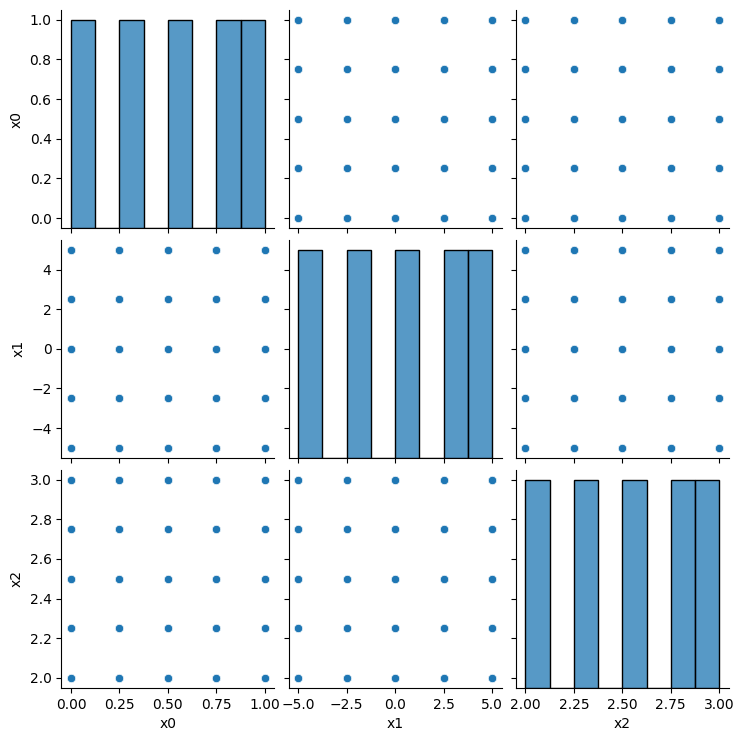

In [13]:
import seaborn as sns

def plot(experimentdata: ExperimentData):
    input_data, output_data = experimentdata.to_pandas()
    sns.pairplot(input_data)   
    
plot(experimentdata)

Fantastic! You can use any packages or software to sample from your ``Domain`` as long as your sampling function complies to the interface that ``f3dasm`` describes!

*The column 'jobs' keeps track of input_data that needs to be evaluated. In the case of our data, they are all open since we haven't evaluated our samples yet!*

<img src=./img/schematics/block_sampling.png width=10%, align='right'>

``f3dasm`` comes with some built-in samplers that you can use right away!

| Name            | Method                             | Reference                                                                                              |
|-----------------|-----------------------------------|--------------------------------------------------------------------------------------------------------|
| `"random"`      | Random Uniform sampling           | [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) |
| `"latin"`       | Latin Hypercube sampling          | [SALib.latin](https://salib.readthedocs.io/en/latest/api/SALib.sample.html?highlight=latin%20hypercube#SALib.sample.latin.sample)         |
| `"sobol"`       | Sobol Sequence sampling           | [SALib.sobol_sequence](https://salib.readthedocs.io/en/latest/api/SALib.sample.html?highlight=sobol%20sequence#SALib.sample.sobol_sequence.sample) |


In [14]:
experimentdata = ExperimentData(domain)
experimentdata.sample(sampler='random', n_samples=100, seed=2023)

In [15]:
experimentdata

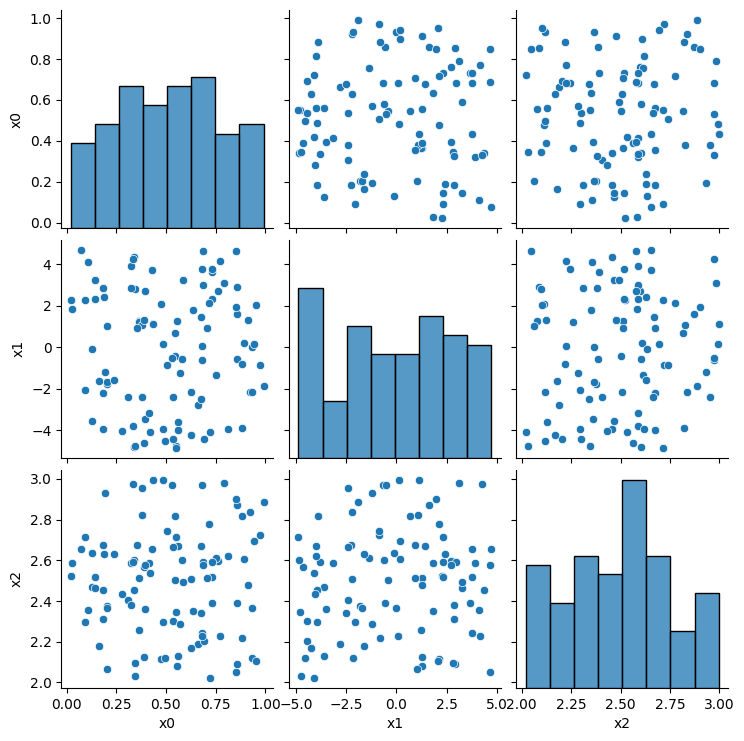

In [16]:
plot(experimentdata)

<img src=./img/schematics/block_sampling.png width=10%, align='right'>

**Method 2**: If you already have input data, you can provide it as a ``pandas`` Dataframe, ``numpy`` array or .csv file

In [17]:
experimentdata_from_df = ExperimentData(domain=domain, input_data='./input_data.csv')
experimentdata_from_df

## ExperimentSample

Each sample of the ``ExperimentData`` can be accessed with the ``._get_experiment_sample`` method with the index of the sample you want to access:

<img src="./img/f3dasm-design.png" width="80%" title="f3dasm experimentsample">

In [18]:
experimentdata_from_df._get_experiment_sample(0)

ExperimentSample(0 : {'x0': 0.3219883039919677, 'x1': 3.904224517894807, 'x2': 2.588052255450474} - {})

<img src=./img/schematics/block_datageneration.png width=10%, align='right'>


This will create a new object of type `ExperimentSample` that is useful in the next section: Data generation!

<img src=./img/schematics/block_datageneration.png width=10%, align='right'>

## 2. Data generation

Now that we have sampled input-data, we can evaluate the designs with a ``DataGenerator``!

To implement your datagenerator, you have to create a new class that inherits from the ``DataGenerator`` base class:

Let's create a simple data generator that computes $f(x) = x \; \mathrm{sin}(x)$

In [19]:
from f3dasm.datageneration import DataGenerator
import numpy as np

class MyDataGenerator(DataGenerator):
    def execute(self):
        
        # Get the input_data and output_data of the ExperimentSample in numpy format
        X, y = self.experiment_sample.to_numpy()
        
        # f(x) = x*sin(x)
        y = np.sum(X * np.sin(X))
        
        # store the objective value under the name 'y'
        self.experiment_sample.store(y, 'y')

<img src=./img/schematics/block_datageneration.png width=10%, align='right'>

Now we instantiate the data generator:

In [20]:
my_data_generator = MyDataGenerator()

And we pass it to the ``evaluate`` method of your data object!

In [21]:
experimentdata.evaluate(my_data_generator, mode='sequential')
experimentdata

The values in the 'jobs' column have been changed from ``open`` to ``finished`` !

<img src=./img/schematics/block_datageneration.png width=10%, align='right'>

There are three modes to evaluate your samples:

* ``sequential``: each ``ExperimentSample`` object is processed one at a time

* ``parallel``: utilizing the multiprocessing capabilities, each ``ExperimentSample`` object is evaluate on a **separate core**

* ``cluster``: Each ``ExperimentSample`` object is run in a **separate node**. After finishing of an evaluation, the node will automatically pick the next available ``ExperimentSample``. This is especially useful in a high-performance computation cluster setting

<img src=./img/schematics/block_datageneration.png width=10%, align='right'>

<img src="./img/Levy.png" width="30%" title="Levy Image" align="right">

A datagenerator can be a call to a **third-party simulation software** (e.g. ABAQUS).
In this example, we are replacing an expensive simulation with any of the built-in benchmark functions: The ``"Levy"`` function:

*Note: the bounds have been normalized to $[0,1]$ in this figure*

``f3dasm`` comes with **73** built-in benchmark function that you can use right away!

*Ports to third-party software will be available in the [f3dasm_simulate](https://bessagroup.github.io/f3dasm_simulate/) extension package*

In [22]:
experimentdata = ExperimentData(domain)
experimentdata.sample(sampler='random', n_samples=100, seed=2023)
experimentdata.evaluate(data_generator="Levy", mode="sequential")

<img src=./img/schematics/block_datageneration.png width=10%, align='right'>

In [23]:
experimentdata

<img src=./img/schematics/block_optimization.png width=10%, align='right'>

## 3. Optimization

With ``f3dasm``, you can optimize the input-parameters of your ``ExperimentData`` object by striving to minimize the output_data:

In [24]:
experimentdata.optimize(data_generator="Levy", optimizer="L-BFGS-B", iterations=100)

/home/martin/Documents/GitHub/F3DASM/src/f3dasm/_src/optimization/adapters/scipy_implementations.py:54: OptimizeWarning: Unknown solver options: population, force_bounds
  minimize(


In [25]:
experimentdata

<img src=./img/schematics/block_optimization.png width=10%, align='right'>

``f3dasm`` comes with some built-in optimizers that you can use right away!

| Name           | Reference                                                      |
| ---------------| --------------------------------------------------------------- |
| `"CG"`             | [scipy.minimize CG](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cg.html) |
| `"L-BFGS-B"`         | [scipy.minimize L-BFGS-B](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html>) |
| `"NelderMead"`     | [scipy.minimize NelderMead](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html) |
| `"RandomSearch"`   | [numpy.random](https://numpy.org/doc/>)       |

*More optimizers are available in the [f3dasm_optimize](https://bessagroup.github.io/f3dasm_optimize/) extension package*


## Storing

After your data-driven process, you can store the data with the ``store`` method:

```
experimentdata.store(filename='my_data')
```

This will store the `input_data` (.csv), `output_data` (.csv) and `domain` (.pkl) to disk 

## Current state of the project

* Researchers of the 'Bessa Research Group' are implementing their research into the ``f3dasm`` framework
* Students are working on projects with `f3dasm` at both Delft University of Technology and Brown University
* Expect to submit the framework to the [Journal of Open Source Software](https://joss.theoj.org/)

## Summary

⭐ ``f3dasm`` provides a **unified interface** for data-driven processes for structures and materials

🫵 You handle the **implementation**, we handle the **process**!

🔨 Built for **scaling** your experiments

💡 Defaults for **benchmarking** and **comparison**

📘 Extensive **documentation** and **testing**


<img src=./img/Brown_logo.svg width=30%>

# F3DASM: Framework for Data-Driven Design & Analysis of Structures & Materials

https://github.com/bessagroup/f3dasm

### Martin van der Schelling | <a href = "mailto: martin_van_der_schelling@brown.edu">martin_van_der_schelling@brown.edu</a>  | PhD candidate